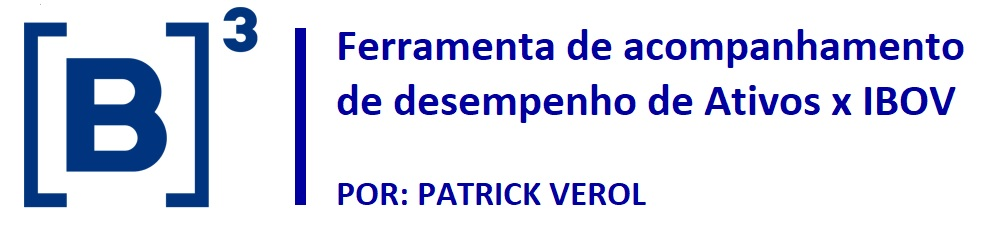

### OBJETIVO:

Criar um modelo para acompanhar o desempenho de ativos do mercado financeiro X IBOV

### ETAPAS DO PROJETO:

1. Importações
2. Análise do IBOV
3. Análise dos ativos da carteira
4. Comparação carteira x IBOV

# 1. Importações

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader.data as web
import seaborn as sns

# 2. Análise do IBOV

In [86]:
cotacao_ibov = web.DataReader('^BVSP', data_source='yahoo', start='2021-01-01', end='2022-04-22')
display(cotacao_ibov)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-01-04,120354,118062,119024,118558,8741400,118558
2021-01-05,119790,116756,118835,119223,9257100,119223
2021-01-06,120924,118917,119377,119851,11638200,119851
2021-01-07,121983,119101,119103,121956,11774800,121956
2021-01-08,125324,122386,122387,125077,11085800,125077
...,...,...,...,...,...,...
2022-04-14,116781,115624,116781,116182,10365400,116182
2022-04-18,116191,115177,116182,115687,8404900,115687
2022-04-19,115687,114277,115687,115057,0,115057


## 2.1. Analisando o gráfico

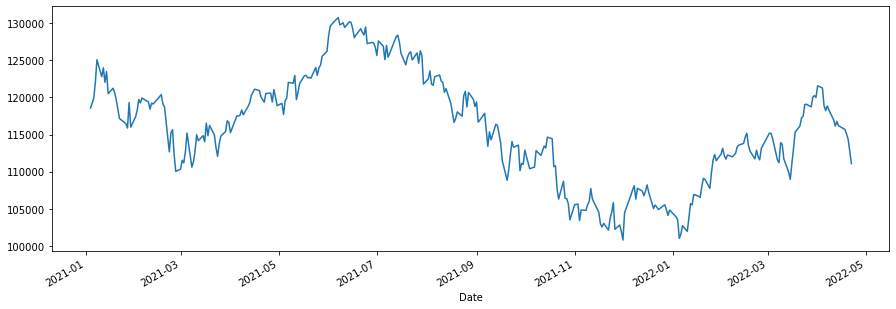

In [87]:
cotacao_ibov['Adj Close'].plot(figsize=(15, 5))
plt.show()

## 2.2. Retorno do IBOV

In [88]:
retorno_ibov = cotacao_ibov['Adj Close'][-1] / cotacao_ibov['Adj Close'][0] - 1
print('Retorno IBOV: {:.2%}'.format(retorno_ibov))

Retorno IBOV: -6.31%


## 2.3. Analisando com Média Móvel

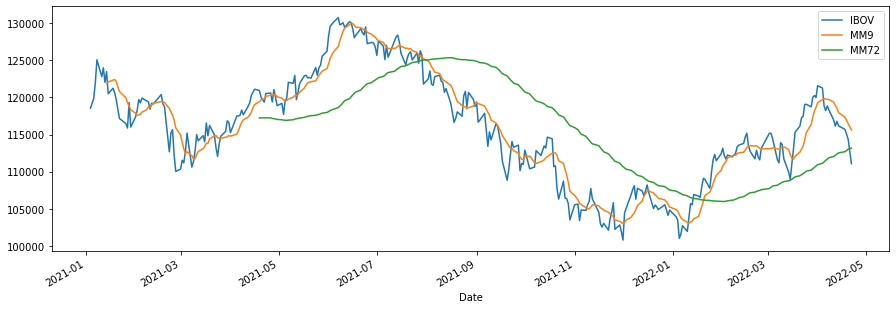

In [89]:
cotacao_ibov['Adj Close'].plot(figsize=(15, 5), label='IBOV')
cotacao_ibov['Adj Close'].rolling(9).mean().plot(label='MM9')
cotacao_ibov['Adj Close'].rolling(72).mean().plot(label='MM72')
plt.legend()
plt.show()

# 3. Análise da performance de uma carteira de ativos
- Basta criar um arquivo 'Carteira.xlsx' com os ativos e suas respectivas quantidades
- Vamos analisar como que os ativos performaram, quanto que rendeu a carteira como um todo e comparar com o IBOV

In [90]:
carteira = pd.read_excel('Carteira.xlsx')
display(carteira)

,Ativos,Tipo,Qtde
0,BOVA11,ETF,100
1,SMAL11,ETF,100
2,MGLU3,Ação,1000
3,BBDC4,Ação,100
4,ITUB4,Ação,100
5,ENEV3,Ação,300
6,MOVI3,Ação,100
7,BPAC11,Ação,100
8,NTCO3,Ação,100
9,BCRI11,FII,100


## 3.1. Criando nosso dataframe de Cotações dos ativos da carteira

In [91]:
cotacoes_carteira = pd.DataFrame()

for ativo in carteira['Ativos']:
    cotacoes_carteira[ativo] = web.DataReader('{}.SA'.format(ativo), data_source='yahoo', start='2021-01-01', end='2022-04-22')['Adj Close']
    
display(cotacoes_carteira)

,BOVA11,SMAL11,MGLU3,BBDC4,ITUB4,ENEV3,MOVI3,BPAC11,NTCO3,BCRI11,VILG11,KNRI11,XPLG11
Date,,,,,,,,,,,,,
2021-01-04,114.089996,134.000000,25.181740,20.793638,29.728571,15.6325,19.543970,22.724648,51.669197,114.779999,126.129997,159.721436,119.785545
2021-01-05,114.690002,133.699997,24.742058,20.666861,29.536160,15.7425,19.418688,22.553749,51.371044,115.000000,127.000000,158.856583,119.835213
2021-01-06,115.550003,131.059998,23.442999,21.351816,30.402033,14.9350,18.882614,21.826208,48.797028,115.599998,126.239998,158.916229,119.318718
2021-01-07,118.370003,130.949997,23.143217,21.918686,31.585405,14.9250,18.736984,21.964531,48.180855,116.300003,126.099998,159.005692,119.487579
2021-01-08,120.400002,132.529999,23.822723,21.729723,31.575775,15.6200,19.513651,22.660295,50.407032,117.190002,125.900002,158.608047,119.239265
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-14,111.650002,114.599998,6.010000,19.463175,26.330000,15.5600,18.490000,25.100000,24.845737,109.000000,101.250000,137.460007,98.089996
2022-04-18,111.459999,115.199997,5.890000,19.808298,26.480000,14.9000,18.420000,25.250000,24.855677,108.760002,100.900002,137.199997,98.300003
2022-04-19,110.919998,116.150002,5.940000,19.570000,26.010000,14.8700,19.080000,25.910000,25.133949,109.300003,100.500000,136.770004,98.989998


## 3.2. Verificando se os dados estão corretos (possíveis dados faltantes)

In [92]:
cotacoes_carteira.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 323 entries, 2021-01-04 to 2022-04-22
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   BOVA11  323 non-null    float64
 1   SMAL11  323 non-null    float64
 2   MGLU3   323 non-null    float64
 3   BBDC4   323 non-null    float64
 4   ITUB4   323 non-null    float64
 5   ENEV3   323 non-null    float64
 6   MOVI3   323 non-null    float64
 7   BPAC11  323 non-null    float64
 8   NTCO3   323 non-null    float64
 9   BCRI11  323 non-null    float64
 10  VILG11  323 non-null    float64
 11  KNRI11  323 non-null    float64
 12  XPLG11  323 non-null    float64
dtypes: float64(13)
memory usage: 35.3 KB


Como não existe nenhum dado faltante podemos seguir com a análise, caso contrário, teríamos que realizar algum tipo de tratamento.

## 3.3. Vamos ver como que as ações foram individualmente

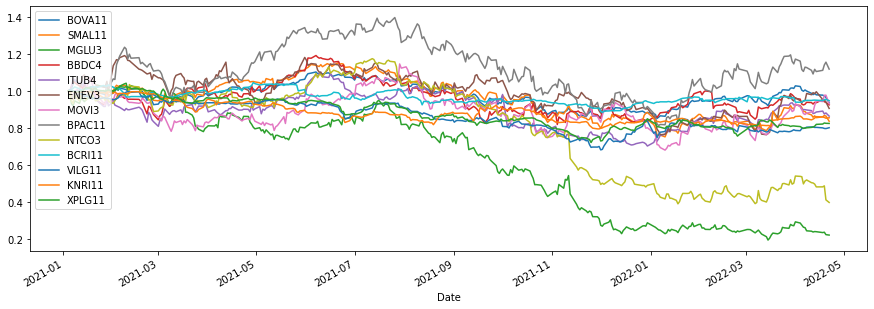

In [93]:
# É necessário normalizar o dados para criar um gráfico de comparação entre os ativos
carteira_norm = cotacoes_carteira / cotacoes_carteira.iloc[0]

carteira_norm.plot(figsize=(15, 5))
plt.legend(loc='upper left')
plt.show()

# 4. Comparação carteira x IBOV 

## 4.1. Vamos puxar o IBOV para comparar

In [94]:
cotacao_ibov = web.DataReader('^BVSP', data_source='yahoo', start='2021-01-01', end='2022-04-22')
display(cotacao_ibov)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-01-04,120354,118062,119024,118558,8741400,118558
2021-01-05,119790,116756,118835,119223,9257100,119223
2021-01-06,120924,118917,119377,119851,11638200,119851
2021-01-07,121983,119101,119103,121956,11774800,121956
2021-01-08,125324,122386,122387,125077,11085800,125077
...,...,...,...,...,...,...
2022-04-14,116781,115624,116781,116182,10365400,116182
2022-04-18,116191,115177,116182,115687,8404900,115687
2022-04-19,115687,114277,115687,115057,0,115057


## 4.2. Criando um dataframe da Carteira com as quantidades de ações

In [95]:
valor_investido = pd.DataFrame()

for ativo in carteira['Ativos']:
    valor_investido[ativo] = cotacoes_carteira[ativo] * carteira.loc[carteira['Ativos']==ativo, 'Qtde'].values[0]
display(valor_investido)

,BOVA11,SMAL11,MGLU3,BBDC4,ITUB4,ENEV3,MOVI3,BPAC11,NTCO3,BCRI11,VILG11,KNRI11,XPLG11
Date,,,,,,,,,,,,,
2021-01-04,11408.999634,13400.000000,25181.739807,2079.363823,2972.857094,4689.749908,1954.397011,2272.464752,5166.919708,11477.999878,12612.999725,15972.143555,11978.554535
2021-01-05,11469.000244,13369.999695,24742.057800,2066.686058,2953.615952,4722.750092,1941.868782,2255.374908,5137.104416,11500.000000,12700.000000,15885.658264,11983.521271
2021-01-06,11555.000305,13105.999756,23442.998886,2135.181618,3040.203285,4480.500126,1888.261414,2182.620811,4879.702759,11559.999847,12623.999786,15891.622925,11931.871796
2021-01-07,11837.000275,13094.999695,23143.217087,2191.868591,3158.540535,4477.500057,1873.698425,2196.453094,4818.085480,11630.000305,12609.999847,15900.569153,11948.757935
2021-01-08,12040.000153,13252.999878,23822.723389,2172.972298,3157.577515,4685.999966,1951.365089,2266.029549,5040.703201,11719.000244,12590.000153,15860.804749,11923.926544
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-14,11165.000153,11459.999847,6010.000229,1946.317482,2632.999992,4668.000126,1848.999977,2510.000038,2484.573746,10900.000000,10125.000000,13746.000671,9808.999634
2022-04-18,11145.999908,11519.999695,5889.999866,1980.829811,2647.999954,4469.999886,1842.000008,2525.000000,2485.567665,10876.000214,10090.000153,13719.999695,9830.000305
2022-04-19,11091.999817,11615.000153,5940.000057,1956.999969,2601.000023,4460.999966,1907.999992,2590.999985,2513.394928,10930.000305,10050.000000,13677.000427,9898.999786


## 4.3. Comparação Carteira x IBOV

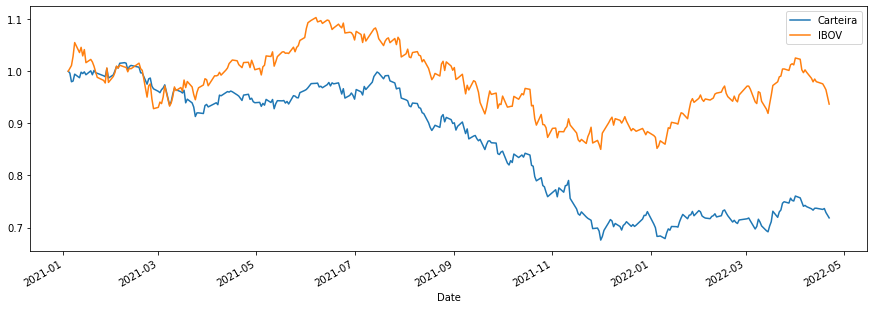

In [96]:
valor_investido['Total'] = valor_investido.sum(axis=1)

valor_investido_norm = valor_investido / valor_investido.iloc[0]
cotacao_ibov_norm = cotacao_ibov / cotacao_ibov.iloc[0]

valor_investido_norm['Total'].plot(figsize=(15, 5), label='Carteira')
cotacao_ibov_norm['Adj Close'].plot(label='IBOV')
plt.legend()
plt.show()

In [97]:
retorno_carteira = valor_investido['Total'][-1] / valor_investido['Total'][0] - 1
retorno_ibov = cotacao_ibov['Adj Close'][-1] / cotacao_ibov['Adj Close'][0] - 1
print('Retorno da Carteira: {:.2%}'.format(retorno_carteira))
print('Retorno IBOV: {:.2%}'.format(retorno_ibov))

Retorno da Carteira: -28.15%
Retorno IBOV: -6.31%


## 4.4. Correlação da Carteira com o IBOV

In [98]:
correlacao = valor_investido['Total'].corr(cotacao_ibov['Adj Close'])
print(correlacao)

0.7483993511118424


## 4.5. Podemos ainda verificar a correlação individual dos ativos com o IBOV

<AxesSubplot:>

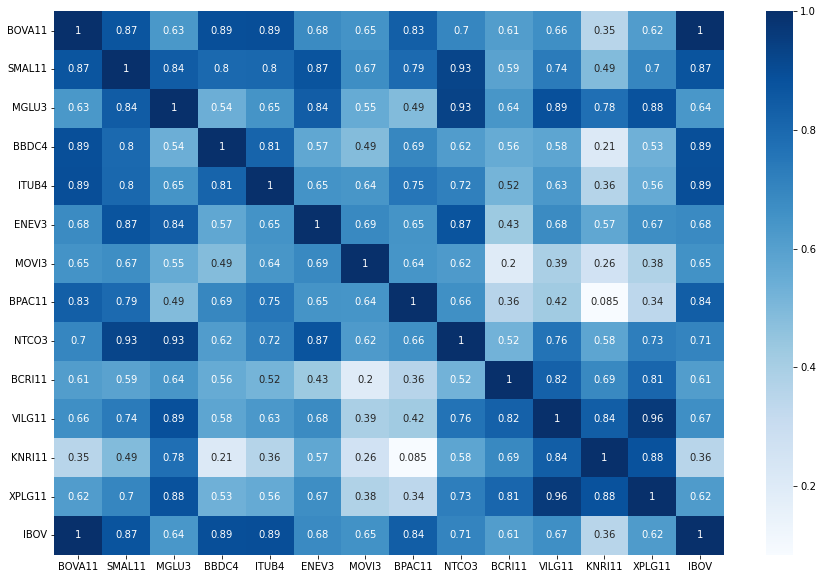

In [99]:
correlacao_ativo_IBOV = valor_investido.drop('Total', axis=1)
correlacao_ativo_IBOV['IBOV'] = cotacao_ibov['Adj Close']
plt.figure(figsize=(15, 10))
sns.heatmap(correlacao_ativo_IBOV.corr(), annot=True, cmap='Blues')